In [1595]:
import requests, scipy, numpy as np, matplotlib.pylab
import urllib, json
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt


In [1596]:
with urllib.request.urlopen("http://youdrive.today/info") as url:
    data = json.loads(url.read().decode())

In [1666]:
area = data['area']
areas = data['areas']
cars = pd.DataFrame(data['cars'])
area_groups = data['area_groups']


In [1598]:
 def inPolygon(x, y, a):
    c=0
    for i in range(len(a)):
        if (((a[i]['longitude']<=y and y<a[i-1]['longitude']) or (a[i-1]['longitude']<=y and y<a[i]['longitude'])) and \
            (x > (a[i-1]['latitude'] - a[i]['latitude']) * (y - a[i]['longitude']) / (a[i-1]['longitude'] - a[i]['longitude']) + a[i]['latitude'])): c = 1 - c    
    return c

In [1599]:
res_areas = {}
count_areas = {} 
out = 0
for i in range(len(cars)):
    inside = False
    for a in areas:
        if a not in res_areas:
                res_areas[a] = {}
                count_areas[a] = 0   
        if inPolygon(cars['latitude'][i], cars['longitude'][i], areas[a]) == 1:
            inside = True
            count_areas[a] += 1
            if cars['model'][i] in res_areas[a]:
                res_areas[a][cars['model'][i]] += 1
            else: 
                res_areas[a][cars['model'][i]] = 1
            break
    if not inside:
        out += 1
        
        


In [1600]:
res_cities = {}
count_cities = {}
for city in area_groups:
    if 'YouDrive' in city:
        break
    if city not in res_cities:
        res_cities[city] = {}
        count_cities[city] = 0
    for a in area_groups[city]:
        if a in res_areas:
            count_cities[city] += count_areas[a]
            for model in res_areas[a]:
                if model in res_cities[city]:
                    res_cities[city][model] += res_areas[a][model]
                else:
                    res_cities[city][model] = res_areas[a][model]

In [1601]:
def get_max(res):
    max_cars = {}
    for i in res:
        if len(res[i]) == 0:
            continue
        max_cars[i] = {}
        maxv = max(res[i].values())
        for j in res[i]:
            if res[i][j] == maxv:
                max_cars[i][j] = res[i][j]
    return max_cars

1) информация об автопарке

In [1602]:
cars.groupby(['model']).size().sort_values(ascending=False)

model
Nissan Qashqai           1936
VW Polo                   362
smart fortwo              205
Kia Rio                   184
Hyundai Creta              95
Kia Rio X-line             82
smart forfour              66
MINI Cooper                63
Hyundai Solaris            59
fortwo turbo               47
Kia Soul                   45
forfour turbo              40
BMW Active Tourer          39
Mercedes A-class           29
Nissan X-Trail             26
Kia Picanto                20
Renault Kaptur              6
Electric scooter lite       6
Renault Arkana              5
bmw i3                      1
forfour soft-top            1
Mercedes A200               1
dtype: int64

Наиболее частая модель в автопарке -- Nissan Qashqai, составляет:

In [1603]:
print(str(len(cars[cars.model == 'Nissan Qashqai'])/len(cars) *100) + '%')

58.348402652200114%


In [1604]:
print('Наиболее частые машины по районам:')
get_max(res_areas)

Наиболее частые машины по районам:


{'MKAD': {'Nissan Qashqai': 645},
 'Himki': {'Nissan Qashqai': 1, 'VW Polo': 1},
 'Kommunarka': {'Nissan Qashqai': 1},
 'Odintsovo_main': {'Nissan Qashqai': 6},
 'Moskovsky': {'Nissan Qashqai': 1, 'smart forfour': 1},
 'BMW_BD': {'smart fortwo': 1},
 'Mega_BD1': {'Nissan Qashqai': 1},
 'Pyhtino_SP': {'Nissan Qashqai': 1,
  'Kia Rio': 1,
  'VW Polo': 1,
  'smart fortwo': 1},
 'Novoperedelkino': {'smart fortwo': 3},
 'Solntsevo': {'Nissan Qashqai': 1},
 'Odintsovo_soyuz': {'Nissan Qashqai': 2},
 'Odintsovo_Sosnovaya': {'Nissan Qashqai': 1},
 'Altufievo_CC': {'Nissan Qashqai': 1},
 'KAD': {'Nissan Qashqai': 1178},
 'Rybackoe': {'Nissan Qashqai': 6},
 'Devyatkino': {'Nissan Qashqai': 3},
 'Murino': {'Nissan Qashqai': 2},
 'Shushary': {'Nissan Qashqai': 8},
 'Pulkovo3_Lenta': {'Nissan Qashqai': 13},
 'MegaParnas': {'Nissan Qashqai': 6},
 'Lenta-Krauta': {'Nissan Qashqai': 9},
 'Кронштадт (Обводный канал)': {'VW Polo': 3},
 'Кронштадт (Остров Котлин)': {'Nissan Qashqai': 1},
 'МО "г. Ломонос

In [1605]:
print('Наиболее частые машины по городам:')
get_max(res_cities)

Наиболее частые машины по городам:


{'moscow': {'Nissan Qashqai': 662},
 'saint_petersburg': {'Nissan Qashqai': 1251},
 'sochi': {'Kia Rio X-line': 50},
 'ekaterinburg': {'Kia Rio X-line': 30}}

Почти половина автопарка располагается в Питере:

In [1606]:
count_cities

{'moscow': 1061, 'saint_petersburg': 1951, 'sochi': 180, 'ekaterinburg': 99}

In [1607]:
m = get_max(res_cities)
for i in m:
    print(i + ': ')
    for car in m[i]:
        print('   '+ car + ': ' + str(res_cities[i][car]/count_cities[i] * 100) + '%')

    

moscow: 
   Nissan Qashqai: 62.39396795475967%
saint_petersburg: 
   Nissan Qashqai: 64.12096360840594%
sochi: 
   Kia Rio X-line: 27.77777777777778%
ekaterinburg: 
   Kia Rio X-line: 30.303030303030305%


3) 
В данный момент в режиме передача:

In [1892]:
print(str(out) + ' машин')

27 машин


Чтобы понять, нужно ли расширять зону, можно отслеживать частоту появления машин вне зоны завершения в течение недели. Далее можно искать наиболее близкие точки и по ним составлять новые зоны (или расширять старые), если частота появления машин в них достаточно высока.
Можно также добавлять новые зоны для конкретных моделей.

In [1877]:
def group(mass):
    size = int(np.round(len(mass)/5))+1
    nmass = [0]*size
    for i in range(len(mass)):
        nmass[i//5] += mass[i]
    return nmass

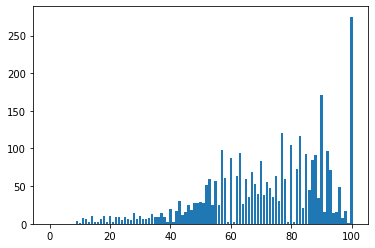

In [1894]:
ob_freq = numpy.bincount(cars['fuel'])
matplotlib.pylab.bar(range(len(ob_freq)), ob_freq)
mean = cars['fuel'].mean()

<BarContainer object of 21 artists>

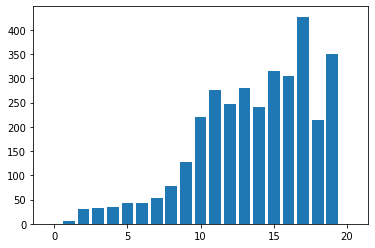

In [1895]:
n_freq = group(ob_freq[1:])
matplotlib.pylab.bar(range(len(n_freq)), n_freq)

2) 
Визуально рапсределение похоже на усеченное нормальное. Поэтому дополняю выборку так, чтобы можно было првоести тест на нормальное распределение.

<BarContainer object of 164 artists>

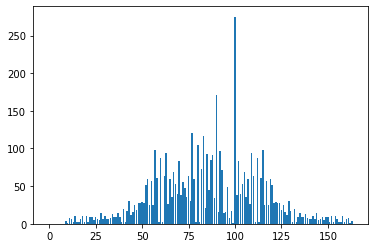

In [1896]:
ecars = []
for car in cars['fuel']:
    if car < np.round(mean):
        ecars.append(np.round(mean) + (100 - car))
        
ncars = np.append(cars['fuel'], ecars)
ncars = ncars.astype(int)
ob_freq2 = numpy.bincount(ncars)
matplotlib.pylab.bar(range(len(ob_freq2)), ob_freq2)

<BarContainer object of 34 artists>

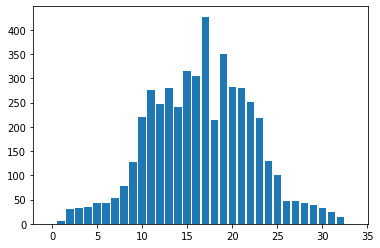

In [1897]:
n2_freq = group(ob_freq2[1:])
matplotlib.pylab.bar(range(len(n2_freq)), n2_freq)

In [1900]:
scipy.stats.normaltest(ncars)

NormaltestResult(statistic=4.456882612780456, pvalue=0.10769616470215522)

В тесте получено значение pvalue=0.1, графики достаточно похожи на нормальные, можно заключить, что уровень топлива -- нормально распределенная величина.

4) 
По имеющимся данным можно узнать об автопарке, системе дисконтирования, зонах работы.
Если периодически сохранять данные с сайта, можно узнать информацию о продолжительности, частоте поездок, узнать время наибольшей загрузки автопарка. Данную инфоримацию можно соответсвенно извлечь для каждой зоны.